<a href="https://colab.research.google.com/github/kanakesh2006/Langgraph_for_Agentic_AI_Concepts/blob/main/Sequential%20Workflows/bmi_sequential_workflows.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install langgraph langchain langchain_google_genai dotenv

In [8]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [13]:
# define state

class BMIState(TypedDict):

  weight_kg: float
  height_m: float
  bmi: float
  category: str

In [14]:
# node functions

def calculate_bmi(state: BMIState) -> BMIState:

  weight = state['weight_kg']
  height = state['height_m']

  bmi = weight / (height**2)

  state['bmi'] = round(bmi, 2)

  return state


def label_bmi(state: BMIState) -> BMIState:

  bmi = state['bmi']

  if bmi < 18.5:
    state['category'] = "Underweight"
  elif 18.5 <= bmi < 25:
    state['category'] = "Normal"
  elif 25 <= bmi < 30:
    state['category'] = "Overweight"
  else:
    state['category'] = "Obese"

  return state



In [16]:
# define graph
graph = StateGraph(BMIState)

# add nodes to to the graph
graph.add_node('Calculate BMI', calculate_bmi)
graph.add_node('Label BMI', label_bmi)

# add edges to the graph
graph.add_edge(START, 'Calculate BMI')
graph.add_edge('Calculate BMI', 'Label BMI')
graph.add_edge('Label BMI', END)

# compile the graph
workflow = graph.compile()


In [17]:
# execute the graph
workflow.invoke({'weight_kg':80, 'height_m': 1.73})

{'weight_kg': 80, 'height_m': 1.73, 'bmi': 26.73, 'category': 'Overweight'}

In [18]:
# execute the graph
initial_state = {'weight_kg':80, 'height_m': 1.73}

final_state = workflow.invoke(initial_state)

print(final_state)

{'weight_kg': 80, 'height_m': 1.73, 'bmi': 26.73, 'category': 'Overweight'}


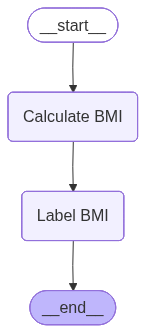

In [19]:
# graph visualization

from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())